In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/boston-house-prices/housing.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("/kaggle/input/boston-house-prices/housing.csv", header=None, delimiter=r"\s+")

# from sklearn.datasets import load_boston
# boston_data = load_boston()

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
acronyms = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "PRICE"
]

df.columns = acronyms
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


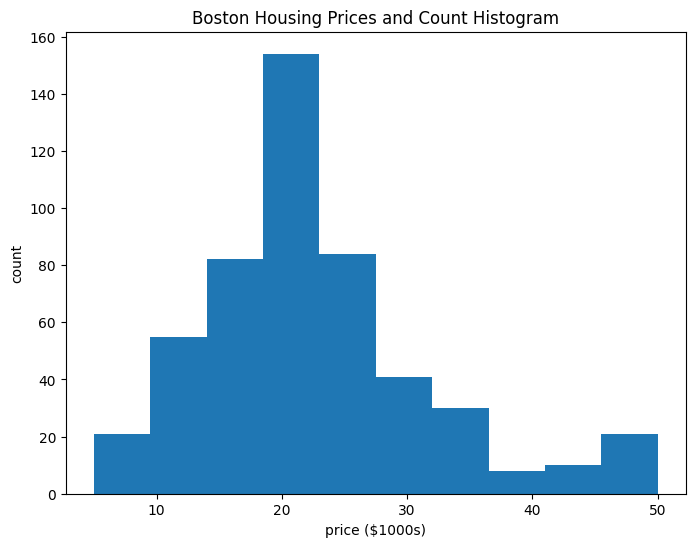

In [11]:
#Distribution of the target variable
plt.figure(figsize=(8, 6));
plt.hist(df['PRICE']);
plt.title('Boston Housing Prices and Count Histogram');
plt.xlabel('price ($1000s)');
plt.ylabel('count');
plt.show();

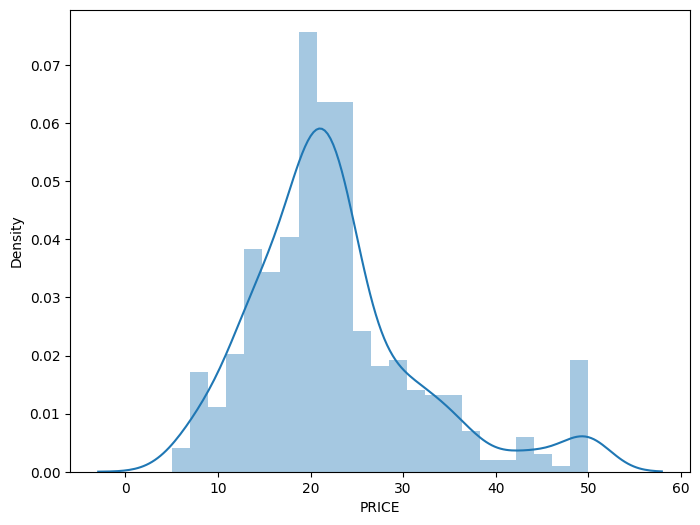

In [12]:
plt.figure(figsize=(8, 6));
sns.distplot(df['PRICE']);

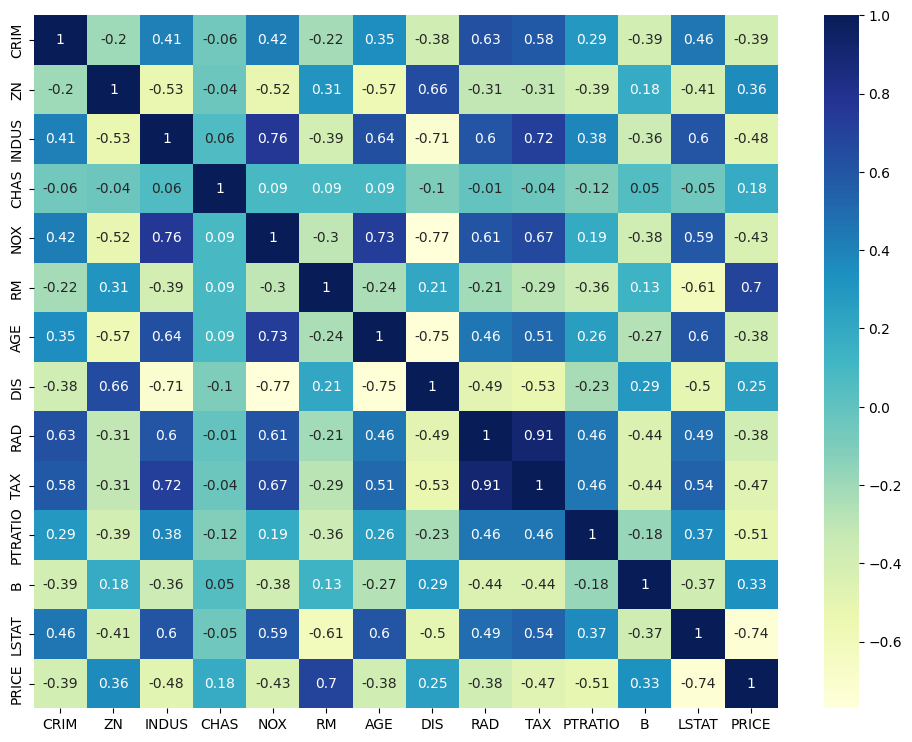

In [13]:
plt.figure(figsize=(12, 9));
correlation_matrix = df.corr().round(2);
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True);

# Model Building

### Linear Regression

In [14]:
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [16]:
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

#### Model evaluation for train set

In [17]:
from sklearn import metrics

In [18]:
y_train_predict = reg_all.predict(X_train)

In [19]:
rmse = (np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

The model performance for training set
--------------------------------------
RMSE is 4.6520331848801675
R2 score is 0.75


#### Model evaluation for test set

In [20]:
y_pred = reg_all.predict(X_test)

In [21]:
rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print(f"The model performance for training set")
print(f"--------------------------------------")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2: {r2}")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.928602182665332
R^2: 0.67


#### error didtribution

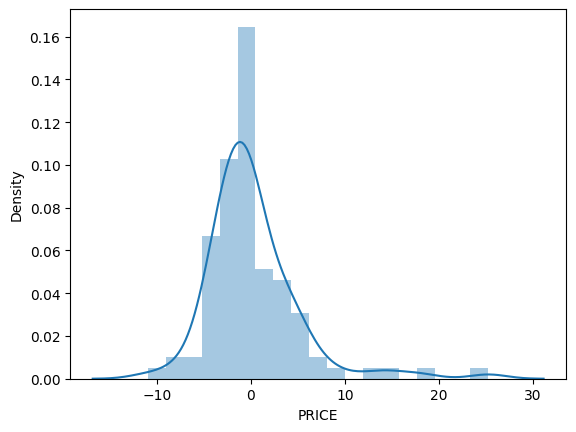

In [22]:
sns.distplot(y_test - y_pred);

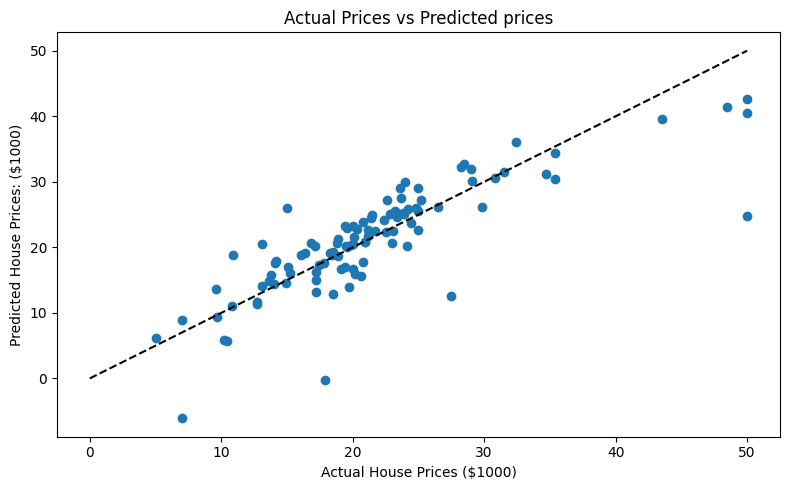

In [23]:
plt.figure(figsize=(8, 5));
plt.scatter(y_test, y_pred);
plt.plot([0, 50], [0, 50], '--k');
#plt.axis('tight');
plt.xlabel("Actual House Prices ($1000)");
plt.ylabel("Predicted House Prices: ($1000)");
#plt.xticks(range(0, int(max(y_test)),2));
#plt.yticks(range(0, int(max(y_test)),2));
plt.title("Actual Prices vs Predicted prices");
plt.tight_layout();

In [24]:
print("RMS: %r " % np.sqrt(np.mean((y_test - y_pred) ** 2)))

RMS: 4.928602182665332 


# Find best model

In [25]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# user variables to tune
seed    = 9
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = dict()
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["Ridge"]         = Ridge()
models["BayesianRidge"] = BayesianRidge()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()

# 10-fold cross validation for each model
model_results = list()
model_names   = list()
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed, shuffle = True)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{:>20}: {:.2f}, {:.2f}".format(model_name, round(results.mean(), 3),
                                  round(results.std(), 3)))

              Linear: -24.07, 11.53
               Lasso: -28.88, 10.90
          ElasticNet: -28.89, 10.17
               Ridge: -24.23, 11.80
       BayesianRidge: -24.88, 11.69
                 KNN: -44.99, 13.80
        DecisionTree: -24.14, 11.20
                 SVR: -71.30, 31.05
            AdaBoost: -15.74, 7.23
       GradientBoost: -12.29, 4.92
        RandomForest: -14.15, 7.63


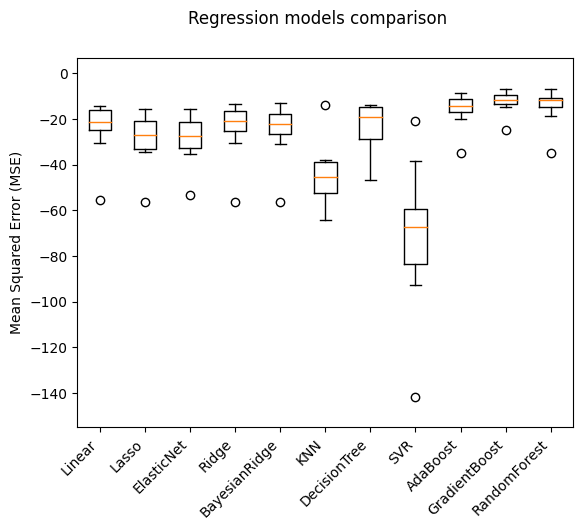

In [26]:
# box-whisker plot to compare regression models
figure = plt.figure();
figure.suptitle('Regression models comparison');
ax = figure.add_subplot(111);
plt.boxplot(model_results);
ax.set_xticklabels(model_names, rotation = 45, ha="right");
ax.set_ylabel("Mean Squared Error (MSE)");
plt.margins(0.05, 0.1);
#plt.savefig("model_mse_scores.png")
plt.show();

Based on the above comparison, we can see that Gradient Boosting Regression model outperforms all the other regression models.

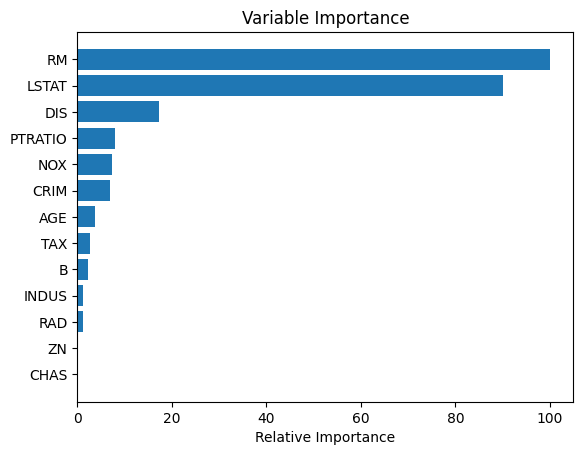

In [28]:
feature_importance = gbr.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5

plt.barh(pos, feature_importance[sorted_idx], align='center');
new_columns = []
for i in sorted_idx:
    new_columns += [acronyms[i]]

plt.yticks(pos, new_columns);
plt.xlabel('Relative Importance');
plt.title('Variable Importance');

In [35]:
feature_importance = gbr.feature_importances_
feature_importance

array([2.85737827e-02, 5.72561289e-04, 4.58105579e-03, 1.80890434e-04,
       3.01679084e-02, 4.15922542e-01, 1.53014506e-02, 7.21964908e-02,
       4.43590856e-03, 1.12533199e-02, 3.33725500e-02, 9.20428411e-03,
       3.74237256e-01])

In [29]:
print("RMS: %r " % np.sqrt(np.mean((gbr_predicted - gbr_expected) ** 2)))

RMS: 2.4746536317731085 


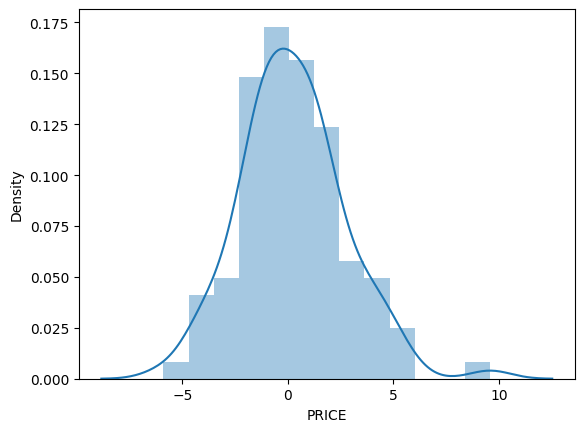

In [30]:
sns.distplot(gbr_expected - gbr_predicted);

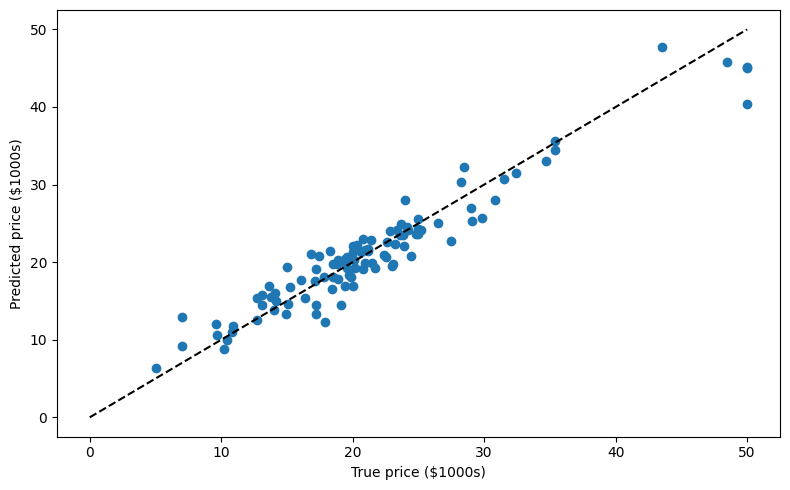

In [31]:
plt.figure(figsize=(8, 5));
plt.scatter(gbr_expected, gbr_predicted)
plt.plot([0, 50], [0, 50], '--k');
#plt.axis('tight');
plt.xlabel('True price ($1000s)');
plt.ylabel('Predicted price ($1000s)');
plt.tight_layout();

# R^2

In [32]:
df.shape

(506, 14)

In [33]:
from sklearn.metrics import r2_score

r_squared = r2_score(gbr_expected, gbr_predicted)


n = len(gbr_expected)
p = 13  # 13 features

# Calculate adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.9164926404538589
Adjusted R-squared: 0.9041563259754517
